# Portfolio Project: Online Payment Fraud Detection
In this project, we will utilize a dataset obtained from Kaggle.com to demonstrate various data science techniques which include the following:

- Exploratory Data Analysis (EDA)
- Data Preparation
- Machine Learning
- Model Evaluation

This dataset consists of fraudulent and non-fraudulent online transactions and our goal is to build a machine learning classification model capable of identifying instances of fraud.

## EDA
To begin, we will import the necessary libraries for basic data manipulation and analysis.

In [1]:
import pandas as pd  # For data manipulation
import numpy as np  # For basic data analysis
from matplotlib import pyplot as plt  # For basic data visualization
import seaborn as sns # For more advanced visualizations

# Reading the dataset from a CSV into a dataframe and reviewing the first few rows
data = pd.read_csv('PS_20174392719_1491204439457_log_reduced.csv')
data.head()

Unnamed: 0  step     type   amount     nameOrig  oldbalanceOrg  \
0           0     1  PAYMENT  9839.64  C1231006815       170136.0   
1           5     1  PAYMENT  7817.71    C90045638        53860.0   
2          25     1  PAYMENT  6061.13  C1043358826          443.0   
3          27     1  PAYMENT  8009.09  C1053967012        10968.0   
4          36     1  PAYMENT  8603.42  C1608633989          253.0   

   newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0       160296.36  M1979787155             0.0             0.0        0   
1        46042.29   M573487274             0.0             0.0        0   
2            0.00  M1558079303             0.0             0.0        0   
3         2958.91   M295304806             0.0             0.0        0   
4            0.00  M1615617512             0.0             0.0        0   

   isFlaggedFraud  
0               0  
1               0  
2               0  
3               0  
4               0

We can see that the 'isFraud' column will be our target variable with '1' representing cases of fraud and '0' representing non-fraud cases.  At first glance, the columns which appear may be useful in training our model are:

- type
- amount
- oldbalanceOrg
- newbalanceOrig
- oldbalanceDest
- newbalanceDest

The 'step' column contains an integer representing the number of hours passed since the recording of the dataset began.  This may be useful in a time-series analysis but not for the classfication model we will be constructing so it will be omitted.

The 'nameOrig' and 'nameDest' columns contain unique identifiers which may provide additional insight with proper transformation considered beyond the scope of this project, so they will be omitted for now.

Of the remaining columns, we have one categorical variable, 'type', and five numeric variables representing dollar amounts.  We should now inspect these values to determine what, if any, transformation might be necessary.  We will assign these column names to their own variable for ease of reference.

In [2]:
# Creating a new variable containing numeric column names
num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Printing statistical summaries of these numeric columns in our dataset
data[num_columns].describe()

amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  1.081646e+06   1.081646e+06    1.081646e+06    1.081646e+06   
mean   1.799674e+05   8.323959e+05    8.536941e+05    1.099945e+06   
std    6.125026e+05   2.881478e+06    2.917500e+06    3.350399e+06   
min    0.000000e+00   0.000000e+00    0.000000e+00    0.000000e+00   
25%    1.337525e+04   0.000000e+00    0.000000e+00    0.000000e+00   
50%    7.456458e+04   1.416600e+04    0.000000e+00    1.326389e+05   
75%    2.089623e+05   1.073064e+05    1.446005e+05    9.430703e+05   
max    9.244552e+07   4.169084e+07    4.143236e+07    3.551855e+08   

       newbalanceDest  
count    1.081646e+06  
mean     1.224592e+06  
std      3.636891e+06  
min      0.000000e+00  
25%      0.000000e+00  
50%      2.149679e+05  
75%      1.110431e+06  
max      3.553805e+08

In [3]:
# Checking how many missing values each column contains
data.isna().sum()

Unnamed: 0        0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

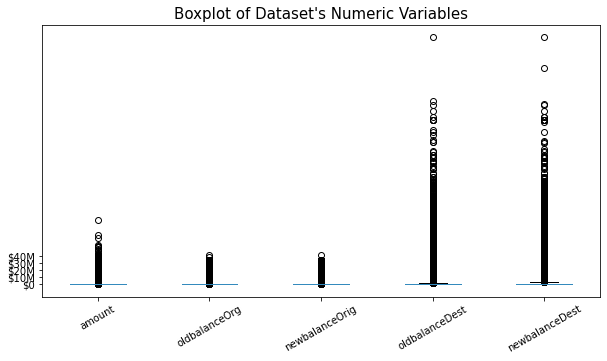

In [4]:
fig, ax = plt.subplots(figsize=(10,5))  # Assigning axes variable and resizing plot
plt.boxplot(x=data[num_columns])  # Creating the boxplot
ax.set_xticklabels(num_columns, rotation=30)  # Relabeling the x-axis
ax.set_yticks(range(0,50000000,10000000))  # Changing the y-axis tick mark distribution
ax.set_yticklabels(['$0', '$10M', '$20M', '$30M', '$40M'])  # Relabeling the y-axis
plt.title('Boxplot of Dataset\'s Numeric Variables', fontsize=15)  # Adding a title to the plot
plt.style.use('ggplot')  # Selecting a plot style to include gridlines
plt.show()  # Displaying the plot

From the checks above, we can conclude the following about the numeric columns to be used in our model:

- They have values ranging from zero to the tens of millions
- They have no null values we need to address
- They each have many outliers

This means that we should normalize these columns, are able to do so now without additional grooming, and should use z-score normalization due to the presence of outliers.

## Data Preparation
We'll now make modifications to our dataset to groom it into a format useable by our machine learning model.

In [5]:
# Importing the normalizing library
from sklearn.preprocessing import Normalizer

# Creating an instance of the normalizer
norm = Normalizer()

# Creating a deep copy of our dataframe so it may be modified with affecting the original
# For convenience, only the columns to be used in training our model will be kept
columns_to_keep = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', \
                   'oldbalanceDest', 'newbalanceDest', 'isFraud']
data_copy = data[columns_to_keep].copy(deep=True)

# Replacing the numeric columns with their normalized values
data_copy[num_columns] = norm.fit_transform(data_copy[num_columns])

With this transformation made, we can take another look at the same boxplot from above to get a better understanding of the distributions.

<Figure size 432x288 with 0 Axes>

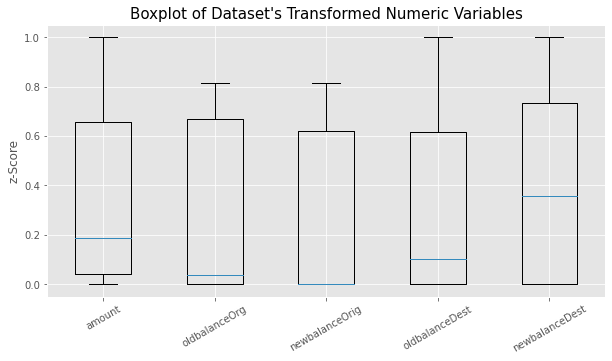

In [6]:
plt.clf()  # Clearing the previous plot formatting
fig, ax = plt.subplots(figsize=(10,5))  # Assigning axes variable and resizing plot
plt.boxplot(x=data_copy[num_columns])  # Creating the boxplot
ax.set_xticklabels(num_columns, rotation=30)  # Relabeling the x-axis
plt.ylabel('z-Score')
plt.title('Boxplot of Dataset\'s Transformed Numeric Variables', fontsize=15)  # Adding a title to the plot
plt.style.use('ggplot')  # Selecting a plot style to include gridlines
plt.show()  # Displaying the plot

The next transformation needing to be done is to create dummy variables for our non-ordinal categorical columns, which in this case is only the 'type'.

In [7]:
data_copy = pd.get_dummies(data_copy, columns = ['type'], prefix = ['type'])
data_copy

amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        0.042057       0.727196        0.685140        0.000000   
1        0.109665       0.755532        0.645868        0.000000   
2        0.997340       0.072894        0.000000        0.000000   
3        0.576212       0.789090        0.212878        0.000000   
4        0.999568       0.029394        0.000000        0.000000   
...           ...            ...             ...             ...   
1081641  0.577350       0.577350        0.000000        0.000000   
1081642  0.357587       0.357587        0.000000        0.404443   
1081643  0.707107       0.707107        0.000000        0.000000   
1081644  0.575251       0.575251        0.000000        0.006242   
1081645  0.085864       0.085864        0.000000        0.657628   

         newbalanceDest  isFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
0              0.000000        0             0              0           0   
1              0.000000        0             0              0           0   
2              0.000000        0             0              0           0   
3              0.000000        0             0              0           0   
4              0.000000        0             0              0           0   
...                 ...      ...           ...            ...         ...   
1081641        0.577350        1             0              1           0   
1081642        0.762030        1             0              1           0   
1081643        0.000000        1             0              0           0   
1081644        0.581493        1             0              1           0   
1081645        0.743492        1             0              1           0   

         type_PAYMENT  type_TRANSFER  
0                   1              0  
1                   1              0  
2                   1              0  
3                   1              0  
4                   1              0  
...               ...            ...  
1081641             0              0  
1081642             0              0  
1081643             0              1  
1081644             0              0  
1081645             0              0  

[1081646 rows x 11 columns]

Our data is now in a format which may be used to train a classification machine learning model.  Our final step is to split the data into training and test sets so we may properly evaluate our model later on.

In [8]:
# Importing the library to split our data
from sklearn.model_selection import train_test_split

# Separating the dataset into separate independent (X) and dependent (y) sets
data_copy_y = data_copy['isFraud']
data_copy_X = data_copy.drop(labels='isFraud', axis=1)

# Splitting the data using an 80/20 train/test split and assigning to appropriate variables
X_train, X_test, y_train, y_test = train_test_split(data_copy_X, data_copy_y)

## Machine Learning
With our data preparation complete, we are now able to train, test, and evaluate various classification models.  There are three models suited for this task which we will be comparing:
- Logistic Regression
- Decision Tree
- Random Forest

We will train each on our data one-by-one then continue with their evaluation. 

### Logistic Regression

In [9]:
# Importing the Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression instance
lr_model = LogisticRegression(max_iter=500)

# Training the Logistic Regression model on our test data
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

### Decision Tree

In [10]:
# Importing the Decision Tree machine learning library
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree instance
dt_model = LogisticRegression(max_iter=500)

# Training the Decision Tree model on our test data
dt_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

### Random Forest

In [11]:
# Importing the Random Forest machine learning library
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest instance
rf_model = RandomForestClassifier()

# Training the Random Forest model on our test data
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

With our three models trained, we can proceed to their evaluation.

## Model Evaluation
Before we can begin comparing our models, we need to determine how we will do so.  Our models' accuracies alone will not make a good metric for comparison in this case for one simple reason:

In [12]:
data['isFraud'].sum() / len(data)

0.001289701066707592

Approximately 0.1% of our data observations are in fact instances of fraud.  That means that if our model were to **never** predict a payment to be fraud, it would still be nearly 99.9% accurate.  The metric we use for comparison must take this into account which leaves us with three options: Precision, Recall, and F1 score.

**Precision:** Would measure how many of the payments the model identifies as fraud are actually fraudulent

**Recall:** Would measure how many of the actual fraudulent payments the model identified as fraud

**F1 Score:** A combination of the two

In reality, this would be a decision to be made by the stakeholders based on what they feel is more important in the model's predictions.  For the sake of this exercise, we will be using recall as one could reasonably argue that correctly identifying cases of fraud is more important than sounding a 'false alarm'.

With the metric of comparison chosen, we will proceed to make predictions with our models and score them.

In [13]:
# Importing the recall calculation library
from sklearn.metrics import recall_score

# Making predictions for our test data using our trained models
lr_y_pred = lr_model.predict(X_test)
dt_y_pred = dt_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)

# Printing our results
print('Logistic Regression Recall:', recall_score(y_test, lr_y_pred))
print('Decision Tree Recall:', recall_score(y_test, dt_y_pred))
print('Random Forest Recall:', recall_score(y_test, rf_y_pred))

Logistic Regression Recall: 0.4837758112094395
Decision Tree Recall: 0.4837758112094395
Random Forest Recall: 0.8112094395280236


## Conclusion
Upon training and evaluating our classification model, we found that the Decision Tree model performed the best by a significant margin.  Going forward, we would make efforts to further enhance this classification model.  For example, we omitted the payment destination ID from our model.  This column could provide significant insight if we were to perform additional analysis on it to create a new independent variable for payments going to destinations previously identified as fraudulent.  Additionally, we would use loops to tune the parameters of each model we train to ensure it's performing optimally before making comparisons.  This would, however, be an extremely computationally heavy task outside the scope of this exercise.